In [73]:
import numpy as np
import matplotlib.pyplot as plt


## Conjugate gradient method
Given $$
A=\begin{pmatrix}
3 & -2\\
-2 & 5
\end{pmatrix}, \quad
\textbf{b}=\begin{pmatrix}
-1\\8
\end{pmatrix}, \quad
c=2. $$

(a) With initial guess $\textbf{x}_{(0)}=\begin{pmatrix} 0\\0 \end{pmatrix}$, apply the conjugate gradient method to find the optimal $\textbf{x}$ where the quadratic form $f(\textbf{x})=\frac{1}{2}\textbf{x}^TA\textbf{x}-\textbf{b}^T\textbf{x}+c$ attains its minimum.

In [74]:
def f(x, A, b, c):
    return 0.5*x.T.dot(A).dot(x) - b.T.dot(x) + c


def paraboloid(A, b, c):
    size = 50
    x1 = x2 = np.linspace(-3, 3, size)
    x1, x2 = np.meshgrid(x1, x2)
    zs = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = np.array([[x1[i, j]], [x2[i, j]]])
            zs[i, j] = f(x, A, b, c)
    return x1, x2, zs


def contoursteps(x1, x2, zs, steps=None):
    fig = plt.figure(figsize=(8, 8))
    levels = [i for i in range(-6, 15)]
    cp = plt.contour(x1, x2, zs, levels)
    plt.clabel(cp, inline=1, fontsize=8)
    plt.grid(True)
    if steps != None:
        steps = np.array(steps)
        plt.plot(steps[:, 0], steps[:, 1], '-o')
    fig.show()


def conj_grad(A, x0):
    steps = [(x0[0][0], x0[1][0])]
    eps = 0.01
    x = x0
    r = b - A.dot(x)
    p = r
    res = [r]
    conj = [p]
    rsold = r.T.dot(r)
    rs0 = rsold
    while rsold > eps**2 * rs0:
        Ap = A.dot(p)
        alpha = rsold / p.T.dot(Ap)
        x = x + alpha * p
        r = r - alpha * Ap
        rsnew = r.T.dot(r)
        p = r + (rsnew / rsold) * p
        rsold = rsnew
        steps.append((x[0][0], x[1][0]))
        res.append(rsnew)
        conj.append(p)
    return x, steps, res, conj


x0 = np.array([[0], [0]])
A = np.array([[3, -2], [-2, 5]])
b = np.array([[-1], [8]])
c = 2


Local minimum occurs at: (1.00, 2.00).


C:\Users\12568\AppData\Local\Temp\ipykernel_6400\2208840133.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


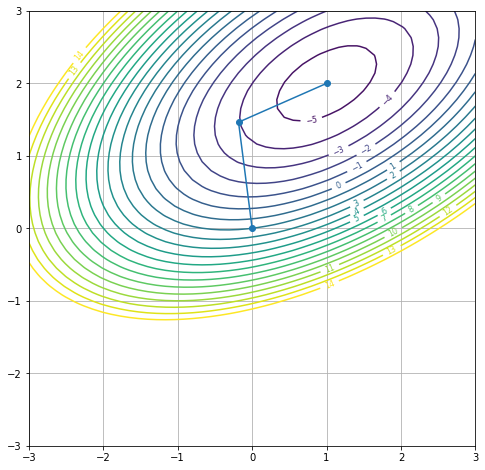

In [75]:
x1, x2, zs = paraboloid(A, b, c)
x, steps, res, conj = conj_grad(A, x0)
contoursteps(x1, x2, zs, steps)
print('Local minimum occurs at: ({:.2f}, {:.2f}).'.format(x[0][0], x[1][0]))


(b)
- (i) Indeed, $A\textbf{x}_{(2)}=\textbf{b}$.

In [76]:
x_2 = np.array([[steps[2][0]], [steps[2][1]]])
print(A.dot(x_2))


[[-1.]
 [ 8.]]


- (ii) Indeed, $\textbf{p}^T_{(1)}A\textbf{p}^T_{(2)}=0$, with small deviations due to floating point errors.

In [77]:
print(conj[1].T.dot(A.dot(conj[2]))[0][0])


-1.8361075846057275e-15


- (iii) Indeed, $\textbf{r}^T_{(1)}\textbf{r}_{(2)}=0$, with small deviations due to floating point errors.

In [78]:
print(res[1].T.dot(res[2])[0][0])


3.5577400894515065e-30


## Sigmoid function
Sigmoid function is defined as $g(z)=\frac{1}{1+e^{-z}}$.
- (a) 
$$\begin{align*} 
g(z)+g(-z) & =\frac{1}{1+e^{-z}}+\frac{1}{1+e^{z}} \\
           & =\frac{e^z}{e^z+1}+\frac{1}{1+e^{z}} \\
           & =\frac{1+e^{z}}{1+e^{z}} \\
           & =1
  \end{align*} $$
- (b) 
$$\begin{align*} 
g'(z) & =\frac{e^{-z}}{(1+e^{-z})^2} \\
           & =\frac{1}{1+e^{-z}}\frac{1}{e^z+1} \\
           & = g(z)g(-z) \\
  \end{align*} $$ 
  By part (a), $g(-z)=1-g(z)$, hence we have
$$g'(z)=g(z)g(-z)=g(z)g[1-g(z)]$$
- (c) Plugging $-z$ into the equation in part (b), we get
$$ g'(-z)=g(-z)g(z)=g'(z)$$
- (d) $$\begin{align*}
g''(z) & =\frac{d}{dz}g'(z)\\
& =\frac{d}{dz}(g(z)g(-z))  & & \text{by part (c)}\\
& =g'(z)g(-z)-g(z)g'(-z)\\
& = [g(z)g(-z)]g(-z)-g(z)[g(-z)g(z)] & & \text{by part (c)}\\
& = g(z)g(-z)[g(-z)-g(z)]\\
\end{align*} $$